## Эксперимент на man & logo

In [1]:
from src import HybridMetaheuristic


model = HybridMetaheuristic("pic/man.png", "pic/logo.png")

/home/evgeny/Documents/vkr/src/utilities.py:108: RuntimeWarning: divide by zero encountered in log
  items.append(i * np.log(i))
/home/evgeny/Documents/vkr/src/utilities.py:108: RuntimeWarning: invalid value encountered in scalar multiply
  items.append(i * np.log(i))


In [2]:
# Запускаю алгоритм гибридной метаэвристики
model.evolution()

  0%|                                                                           | 0/100 [00:00<?, ?it/s]

Best score: 2.6343830940666972


  6%|███▊                                                            | 6/100 [14:11<3:45:18, 143.81s/it]

Best score: 2.6230396631357418


  7%|████▍                                                           | 7/100 [16:21<3:35:55, 139.30s/it]

Best score: 2.6090483047009316


  9%|█████▊                                                          | 9/100 [20:45<3:26:10, 135.94s/it]

Best score: 2.607958586992381


 11%|██████▉                                                        | 11/100 [24:13<2:51:41, 115.75s/it]

Best score: 2.603568377419455


 15%|█████████▌                                                      | 15/100 [28:56<1:56:35, 82.30s/it]

Best score: 2.601735593052042


 20%|████████████▊                                                   | 20/100 [35:26<1:44:44, 78.56s/it]

Best score: 2.5992868336577004


 22%|██████████████                                                  | 22/100 [37:48<1:37:40, 75.13s/it]

Best score: 2.596781899986204


 23%|██████████████▋                                                 | 23/100 [38:59<1:34:33, 73.69s/it]

Best score: 2.595495126349509


 24%|███████████████▎                                                | 24/100 [40:13<1:33:33, 73.86s/it]

Best score: 2.5937078258801214


 26%|████████████████▋                                               | 26/100 [42:52<1:33:29, 75.81s/it]

Best score: 2.592020282067808


 30%|███████████████████▏                                            | 30/100 [48:49<1:37:01, 83.16s/it]

Best score: 2.5911720406362635


 32%|████████████████████▍                                           | 32/100 [51:27<1:31:30, 80.74s/it]

Best score: 2.590577339060028


 33%|█████████████████████                                           | 33/100 [52:40<1:27:20, 78.22s/it]

Best score: 2.5902032003534208


 34%|█████████████████████▊                                          | 34/100 [53:54<1:24:48, 77.10s/it]

Best score: 2.5895155175560998


 35%|██████████████████████▍                                         | 35/100 [55:41<1:33:01, 85.86s/it]

Best score: 2.58830596146146


 36%|███████████████████████                                         | 36/100 [56:47<1:25:19, 79.99s/it]

Best score: 2.5877098777792282


 37%|███████████████████████▋                                        | 37/100 [58:07<1:24:05, 80.09s/it]

Best score: 2.5870314477375045


 43%|██████████████████████████▋                                   | 43/100 [1:05:23<1:11:28, 75.23s/it]

Best score: 2.5864409698854702


100%|███████████████████████████████████████████████████████████████| 100/100 [2:20:01<00:00, 84.02s/it]


In [3]:
# Лучший параметр Светлячка
model.best_firefly_value

10.214132703970531

In [4]:
from src import Watermark

# Пробую погрузить ЦВЗ с полученными параметрами
watermark = Watermark(
    model.best_candidate_indexes, 
    model.embedded_image_bin, 
    model.image_matrix, 
    model.best_firefly_value
)

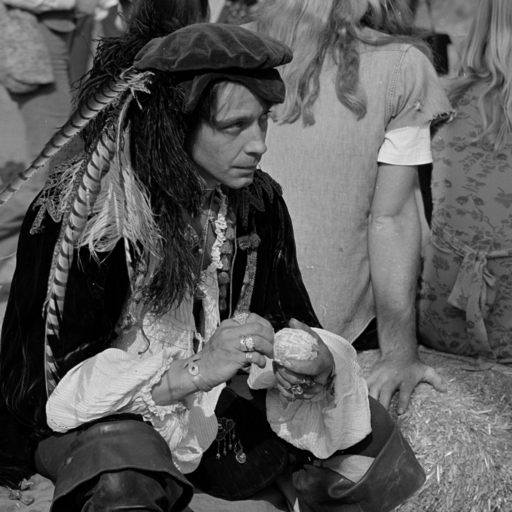

In [5]:
# Исходное изображение без ЦВЗ
model.image

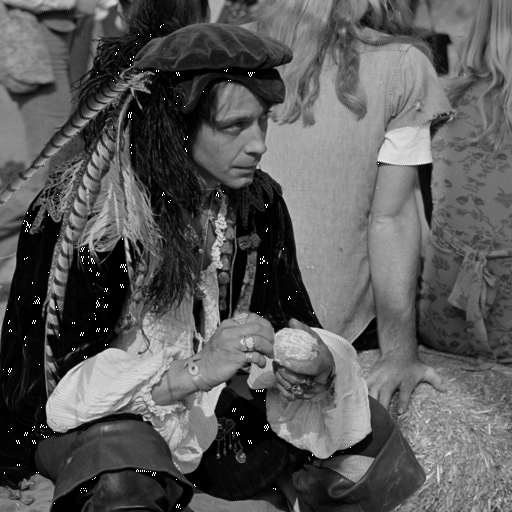

In [6]:
# Полученное изображение с ЦВЗ
watermark.watermark

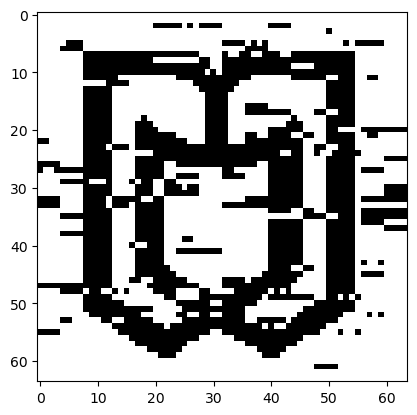

In [7]:
import matplotlib.pyplot as plt

plt.imshow(watermark.extracted_image_bin, cmap=plt.cm.gray)

In [8]:
from src import Attack, Utilities

attacked = Attack(watermark.watermark)

In [9]:
# медианный фильтр

mf = Utilities.extracting(Utilities.matrix_to_image(attacked.mf), watermark.secret_key)
Utilities.get_normal_correlation(mf, watermark.embedded_image_bin)

0.6361809045226131

In [10]:
# фильтр Гаусса

gs3 = Utilities.extracting(Utilities.matrix_to_image(attacked.gs3), watermark.secret_key)
Utilities.get_normal_correlation(gs3, watermark.embedded_image_bin)

0.9590417310664606

In [11]:
# фильтр Гаусса, kernel=5

gs5 = Utilities.extracting(Utilities.matrix_to_image(attacked.gs5), watermark.secret_key)
Utilities.get_normal_correlation(gs5, watermark.embedded_image_bin)

0.9590417310664606

In [12]:
# усредненная фильтрация, kernel=3

avr = Utilities.extracting(Utilities.matrix_to_image(attacked.avr), watermark.secret_key)
Utilities.get_normal_correlation(avr, watermark.embedded_image_bin)

0.5760814249363868

In [13]:
# Фильтр увеличивает контраст соседних пикселей

shr = Utilities.extracting(Utilities.matrix_to_image(attacked.shr), watermark.secret_key)
Utilities.get_normal_correlation(shr, watermark.embedded_image_bin)

0.9597678916827853

In [14]:
# Изменение контрастности изображения с использованием гистограмм

his = Utilities.extracting(Utilities.matrix_to_image(attacked.his), watermark.secret_key)
Utilities.get_normal_correlation(his, watermark.embedded_image_bin)

0.9534436321662177

In [15]:
# Искажения яркости пикселей с параметром gamma=0.2

gc2 = Utilities.extracting(Utilities.matrix_to_image(attacked.gc2), watermark.secret_key)
Utilities.get_normal_correlation(gc2, watermark.embedded_image_bin)

0.8507853403141361

In [16]:
# Искажения яркости пикселей с параметром gamma=0.4

gc4 = Utilities.extracting(Utilities.matrix_to_image(attacked.gc4), watermark.secret_key)
Utilities.get_normal_correlation(gc4, watermark.embedded_image_bin)

0.9304750869061413

In [17]:
# Гауссовый шум с параметром 0,001

gn1 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn1), watermark.secret_key)
Utilities.get_normal_correlation(gn1, watermark.embedded_image_bin)

0.959349593495935

In [18]:
# Гауссовый шум с параметром 0,005

gn5 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn5), watermark.secret_key)
Utilities.get_normal_correlation(gn5, watermark.embedded_image_bin)

0.9570931580981832

In [19]:
# Гауссовый шум с параметром 0,009

gn9 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn9), watermark.secret_key)
Utilities.get_normal_correlation(gn9, watermark.embedded_image_bin)

0.952639751552795

In [20]:
# Атака соль/перец с параметром p=0.01

sp1 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp1), watermark.secret_key)
Utilities.get_normal_correlation(sp1, watermark.embedded_image_bin)

0.8658843252305113

In [21]:
# Атака соль/перец с параметром p=0.02

sp2 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp2), watermark.secret_key)
Utilities.get_normal_correlation(sp2, watermark.embedded_image_bin)

0.8213814342278927

In [22]:
# Атака соль/перец с параметром p=0.03

sp3 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp3), watermark.secret_key)
Utilities.get_normal_correlation(sp3, watermark.embedded_image_bin)

0.7821604661586733

In [23]:
# В заданной области затемняет 1/4 пикселей, с параметром center

crp_ct = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_ct), watermark.secret_key)
Utilities.get_normal_correlation(crp_ct, watermark.embedded_image_bin)

0.8539778449144008

In [24]:
# В заданной области затемняет 1/4 пикселей, с параметром top-left

crp_tl = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_tl), watermark.secret_key)
Utilities.get_normal_correlation(crp_tl, watermark.embedded_image_bin)

0.8721523291397484

In [25]:
# В заданной области затемняет 1/4 пикселей, с параметром bottom-right

crp_br = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_br), watermark.secret_key)
Utilities.get_normal_correlation(crp_br, watermark.embedded_image_bin)

0.850690933602966

In [26]:
# Растягивает изображения и возвращает к изначальным размерам 

scl_1024 = Utilities.extracting(Utilities.matrix_to_image(attacked.scl_1024), watermark.secret_key)
Utilities.get_normal_correlation(scl_1024, watermark.embedded_image_bin)

0.9341130604288499

In [27]:
# Сжимает изображения и возвращает к изначальным размерам 

scl_256 = Utilities.extracting(Utilities.matrix_to_image(attacked.scl_256), watermark.secret_key)
Utilities.get_normal_correlation(scl_256, watermark.embedded_image_bin)

0.6764013188883655

In [28]:
# Вращает изображение против часовой стрелки на заданный угол, 5 градусов

rt5 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt5), watermark.secret_key)
Utilities.get_normal_correlation(rt5, watermark.embedded_image_bin)

0.69

In [29]:
# Вращает изображение против часовой стрелки на заданный угол, 45 градусов

rt45 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt45), watermark.secret_key)
Utilities.get_normal_correlation(rt45, watermark.embedded_image_bin)

0.6760609005506965

In [30]:
# Вращает изображение против часовой стрелки на заданный угол, 90 градусов

rt90 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt90), watermark.secret_key)
Utilities.get_normal_correlation(rt90, watermark.embedded_image_bin)

0.683852140077821

In [31]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 70

com70 = Utilities.extracting(Utilities.matrix_to_image(attacked.com70), watermark.secret_key)
Utilities.get_normal_correlation(com70, watermark.embedded_image_bin)

0.9597834493426141

In [32]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 80

com80 = Utilities.extracting(Utilities.matrix_to_image(attacked.com80), watermark.secret_key)
Utilities.get_normal_correlation(com80, watermark.embedded_image_bin)

0.9597834493426141

In [33]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 90

com90 = Utilities.extracting(Utilities.matrix_to_image(attacked.com90), watermark.secret_key)
Utilities.get_normal_correlation(com90, watermark.embedded_image_bin)

0.9597834493426141